In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sktime.datasets import load_airline
X = load_airline()

def fourierTransform(seq):
    dft_seq = np.fft.fft(seq)
    return pd.Series(dft_seq)

def inverseFourierTransform(seq):
    idft_seq = np.fft.ifft(seq)
    return pd.Series(idft_seq)

In [3]:
X_ft = fourierTransform(X)

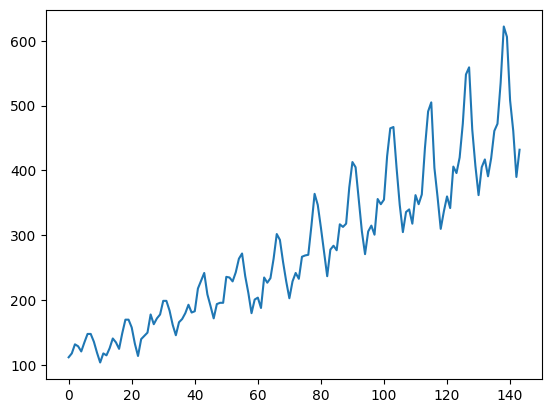

In [4]:
plt.plot(X.tolist())

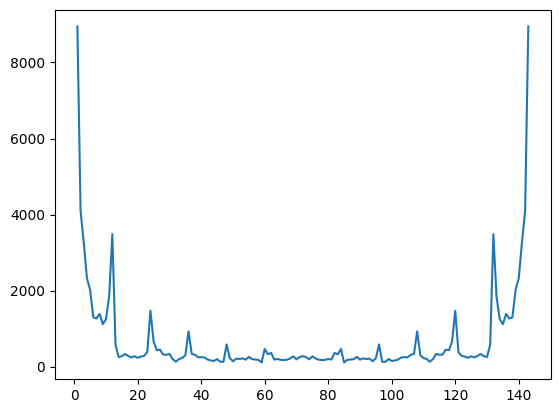

In [5]:
plt.plot(np.abs(X_ft[1:]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


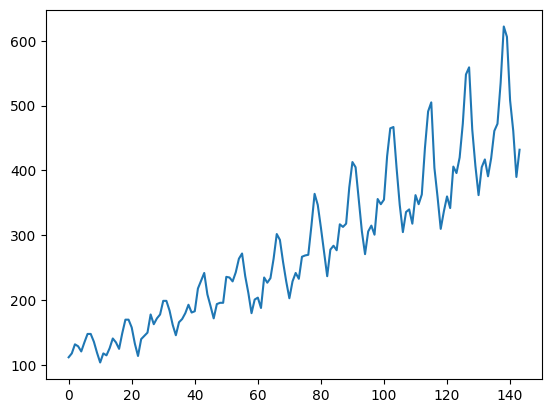

In [6]:
plt.plot(inverseFourierTransform(X_ft))

In [7]:
np.set_printoptions(precision=2, suppress=True)
df = pd.read_csv("data/data60.csv")

passengers = [df[(df["line"] == f"{i+1}A") & (df["date"] < '2023-10-01')]["passengersBoarding"].tolist() for i in range(6)]
passengers_ft = [fourierTransform(passenger_line) for passenger_line in passengers]
nsamples = len(passengers[0])
print('samples', nsamples)
#passengers_ft_real = [np.abs(passenger_line)[:(len(passenger_line) // 2)] for passenger_line in passengers_ft]

max_magnitude_of_passengers = []
for passenger_line in passengers_ft:
    max_magnitude_of_line = []
    norms = np.abs(passenger_line[:nsamples//2][1:])

    # pick the n largest but not DC
    amount_of_tops = 2
    max_index = np.argsort(norms)[-amount_of_tops::][::-1] + 1
    print(norms[max_index])
    # find the period
    print('periods in hours', 2*np.pi / (np.pi * max_index.values/(nsamples/2)))

    # 0-array except for largest magnitudes
    max_magnitude_of_line = np.zeros(nsamples)
    max_magnitude_of_line[max_index] = norms[max_index]
    max_magnitude_of_passengers.append(max_magnitude_of_line + max_magnitude_of_line[::-1])

    #max_val = max(norms)
    #max_magnitude_of_line.append(0)
    #for k, obs in enumerate(passenger_line[:nsamples//2][1:]):
    #    if not (k == 1368):#np.abs(obs) != max_val:
    #        max_magnitude_of_line.append(0)
    #    else:
    #        max_magnitude_of_line.append(obs)
    #        print('largest', k+1)
    #max_magnitude_of_passengers.append(max_magnitude_of_line + max_magnitude_of_line[::-1])


samples 32856
1369    5.065352e+06
1       1.526303e+06
dtype: float64
periods in hours [   24. 32856.]
1369    5.014381e+06
1       1.225677e+06
dtype: float64
periods in hours [   24. 32856.]
1369    3.516914e+06
4107    8.466083e+05
dtype: float64
periods in hours [24.  8.]
1369    5.868390e+06
4107    1.805512e+06
dtype: float64
periods in hours [24.  8.]
1369    2.612249e+06
4107    9.489290e+05
dtype: float64
periods in hours [24.  8.]
1369    4.240498e+06
4107    2.153902e+06
dtype: float64
periods in hours [24.  8.]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


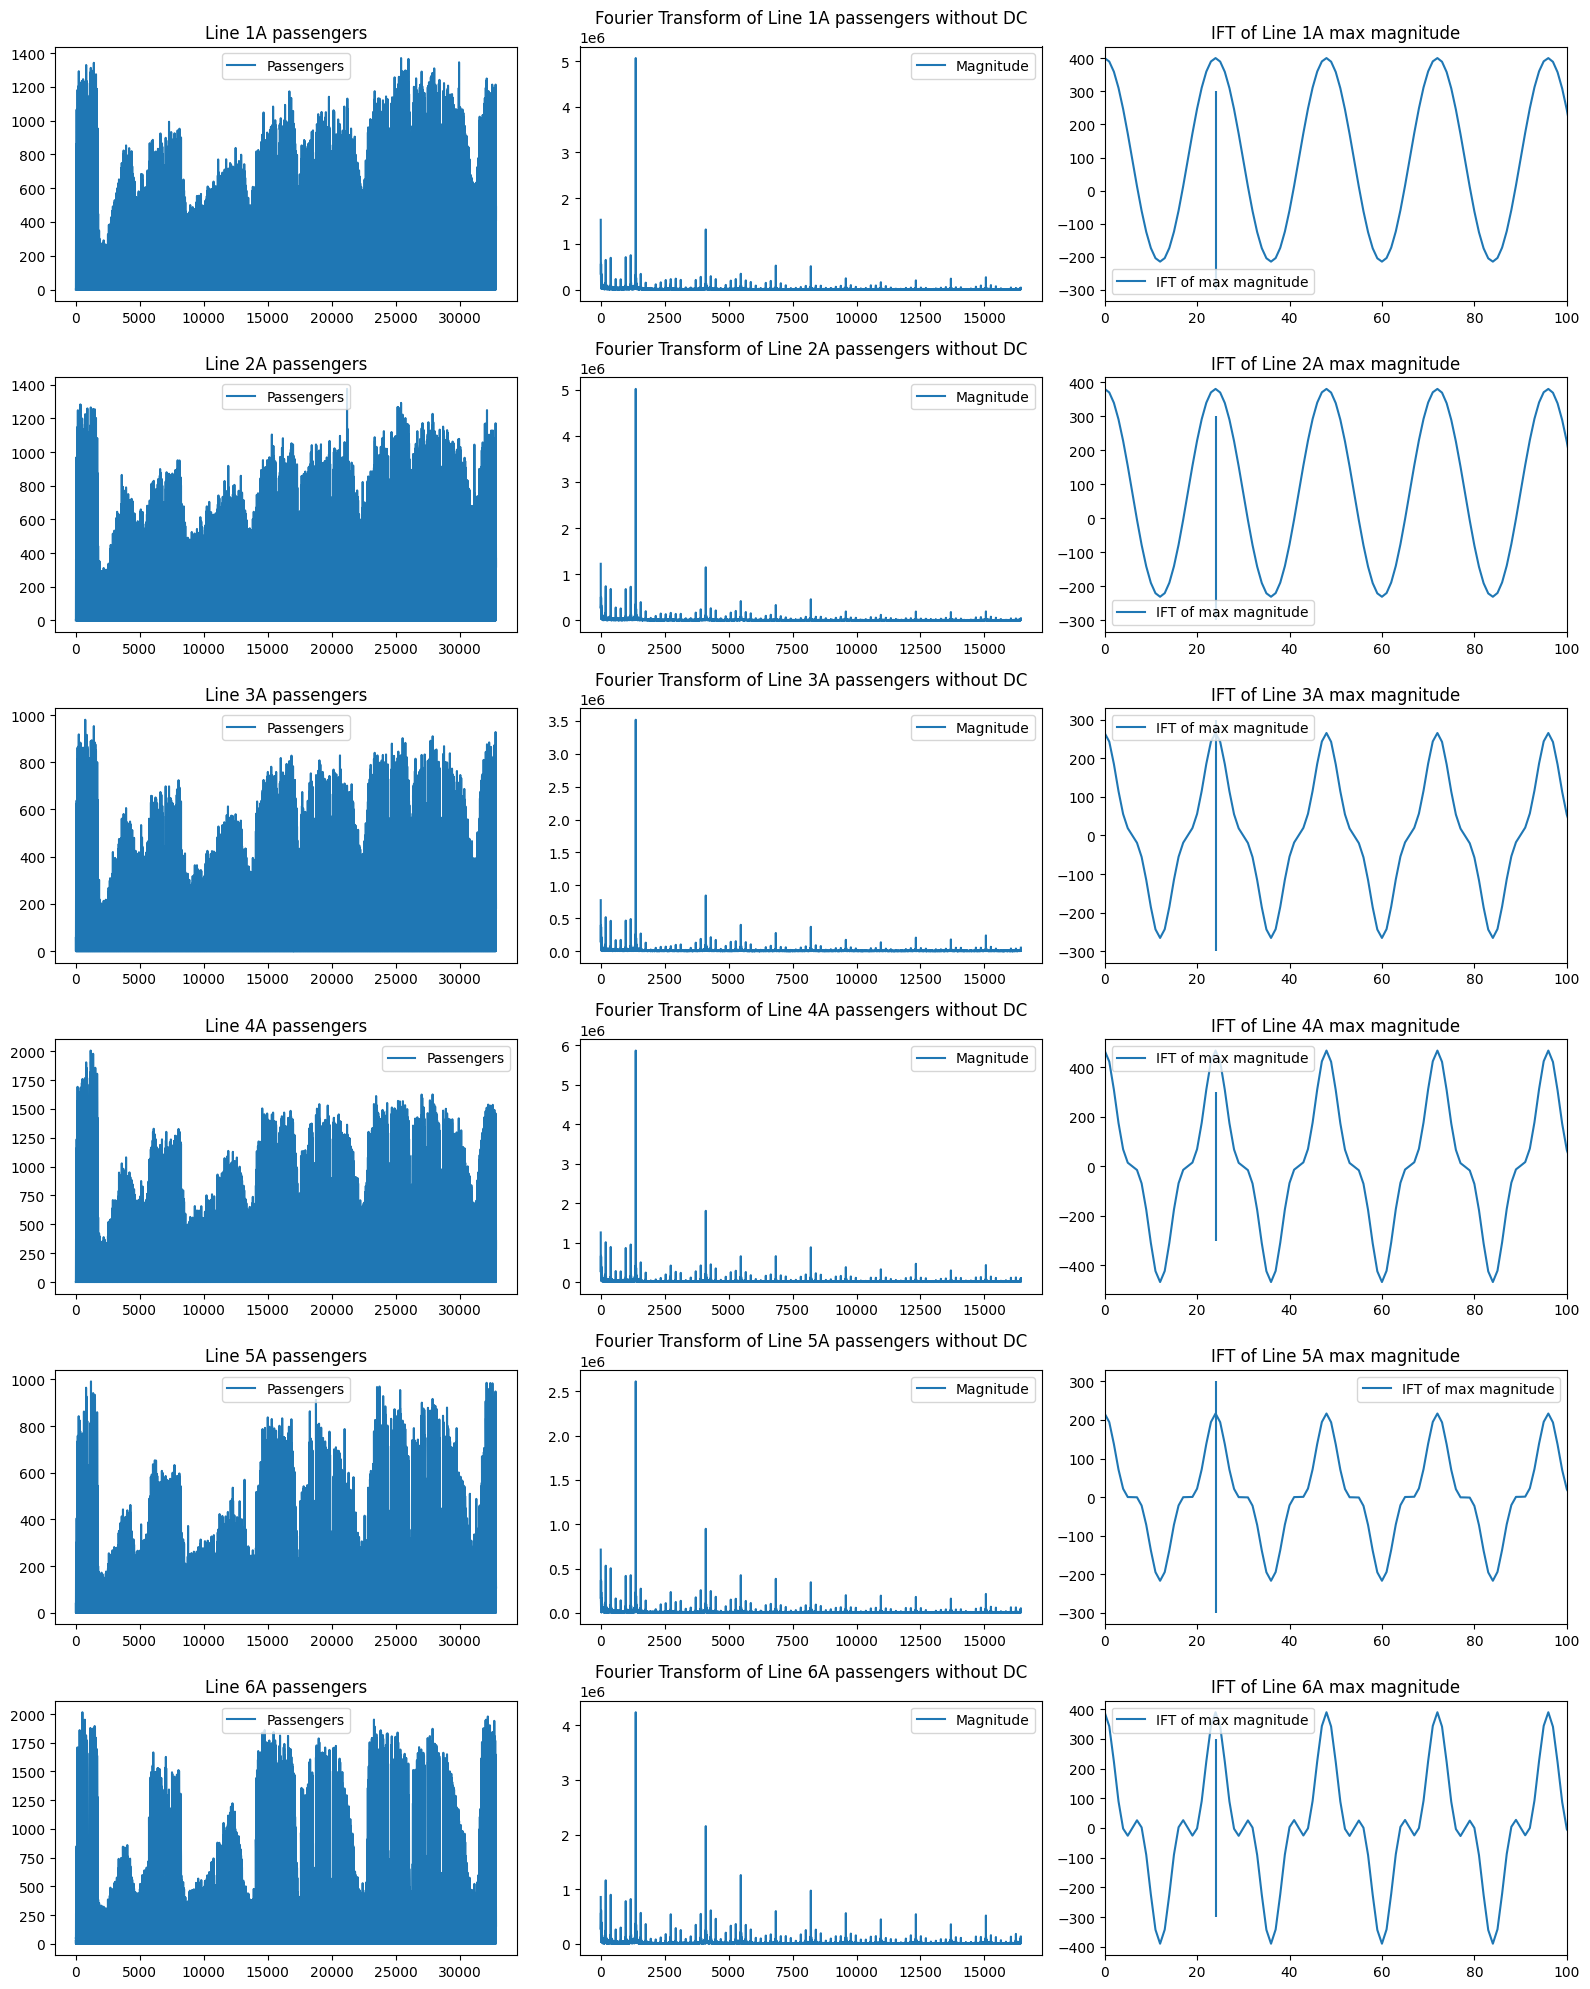

In [8]:
# Create a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 20))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot on each subplot
for i in range(0, 6):
    # plot passenger
    axes[i*3].plot(passengers[i], label=f"Passengers")
    axes[i*3].set_title(f"Line {i+1}A passengers")
    axes[i*3].legend()

    # plot frequency spectrum without DC
    mag = np.abs(passengers_ft[i][1:nsamples//2])
    axes[(i*3)+1].plot(mag, label=f"Magnitude")
    axes[(i*3)+1].set_title(f"Fourier Transform of Line {i+1}A passengers without DC")
    axes[(i*3)+1].legend()

    # plot inverse transform
    #axes[(i*3)+2].plot(inverseFourierTransform(max_magnitude_of_passengers[i][len(max_magnitude_of_passengers)//2:]), label=f"IFT of max magnitude")
    axes[(i*3)+2].plot(inverseFourierTransform(max_magnitude_of_passengers[i]), label=f"IFT of max magnitude")
    axes[(i*3)+2].set_title(f"IFT of Line {i+1}A max magnitude")
    axes[(i*3)+2].legend()
    axes[(i*3)+2].set_xlim([0, 100])
    axes[(i*3)+2].vlines(x=24, ymin=-300, ymax=300)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()